In [420]:
!{sys.executable} -m pip install graphviz

In [419]:
!{sys.executable} -m pip install pydot

In [418]:
!{sys.executable} -m pip install Stocker

In [406]:
!{sys.executable} -m pip install tensorflow

    100% |████████████████████████████████| 165.1MB 254kB/s eta 0:00:01
    100% |████████████████████████████████| 3.0MB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 6.2MB/s ta 0:00:011
    100% |████████████████████████████████| 460kB 21.1MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 4.3MB/s ta 0:00:01
    100% |████████████████████████████████| 3.4MB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 22.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 19.3MB/s ta 0:00:01
    100% |████████████████████████████████| 10.6MB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 5.1MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/6d/38/c21ef5034684ffc0412deefbb07d66678332290c14bb5269c85145fbd55e/setuptools-50.3.2-py3-none-any.whl
    100% |████████████████████████████████| 102kB 16.7MB/s a 0:00:01
    100% |████████████████████████████████| 122kB 23.5MB/s ta 0:00:01
    1

    100% |████████████████████████████████| 81kB 16.0MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 24.0MB/s ta 0:00:01
  Stored in directory: /Users/anshupriyasrivastava/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


In [404]:
import sys
!{sys.executable} -m pip install keras

In [10]:
import sys
!{sys.executable} -m pip install pyfolio

In [12]:
!{sys.executable} -m pip install PyPortfolioOpt

    100% |████████████████████████████████| 51kB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 839kB 8.4MB/s ta 0:00:011
    100% |████████████████████████████████| 3.1MB 7.8MB/s eta 0:00:01
    100% |████████████████████████████████| 28.7MB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 163kB 22.9MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 19.2MB/s ta 0:00:01
    100% |████████████████████████████████| 3.6MB 14.0MB/s ta 0:00:01
  Stored in directory: /Users/anshupriyasrivastava/Library/Caches/pip/wheels/4b/7d/90/39ff7dca0e5c06740afc993ab4209a1719fc1d616daf7af040
  Stored in directory: /Users/anshupriyasrivastava/Library/Caches/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86bc6ea84363965c5f
Successfully built ecos scs
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1


In [78]:
!{sys.executable} -m pip install statsmodels

In [267]:
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
#Reading data and finding returns

portfolio = pd.read_csv("Data/portfolio_financial_services.csv", parse_dates=['Date'], index_col='Date')
returns = portfolio.pct_change()

In [269]:
returns.head()

,C,GS,JPM,MS
Date,,,,
2005-01-03,nan,nan,nan,nan
2005-01-04,-0.008,-0.006,-0.010,-0.011
2005-01-05,0.013,-0.005,0.002,-0.006
2005-01-06,0.010,0.014,0.006,0.024
2005-01-07,-0.006,-0.004,-0.008,-0.004


In [270]:
#Calculating volatility using covariance matrix and annualizing
#Portfolio return volatility = risk

covariance = returns.cov()*252

In [271]:
#diagonal covaraince of individual asset
#off-diagonal covariance between assets

print(covariance)

        C    GS   JPM    MS
C   0.282 0.136 0.158 0.183
GS  0.136 0.136 0.109 0.155
JPM 0.158 0.109 0.152 0.137
MS  0.183 0.155 0.137 0.267


In [272]:
#equal weighted analysis

weights = [0.25, 0.25, 0.25, 0.25]
portfolio_variance = np.transpose(weights) @ covariance @ weights

In [273]:
portfolio_variance

0.16197529304074376

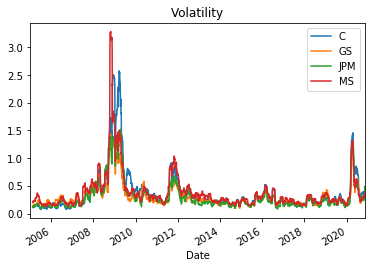

In [274]:
#volatility of the time series

windowed = returns.rolling(30)
volatility = windowed.std()*np.sqrt(252)
volatility.plot(title='Volatility')

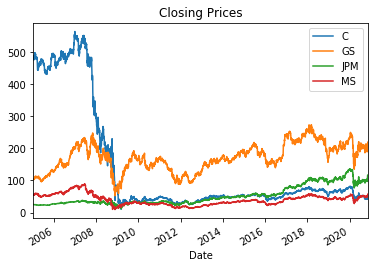

In [275]:
# Plot portfolio's asset prices during this time
portfolio.plot(title='Closing Prices')
plt.show()

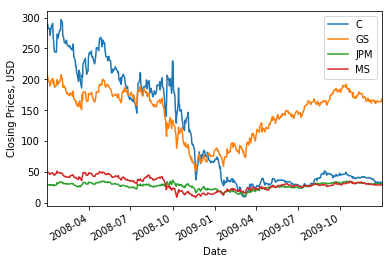

In [276]:
#Portfolio returns during the crisis

# Selected portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices_crisis = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices_crisis.plot().set_ylabel("Closing Prices, USD")
plt.show()

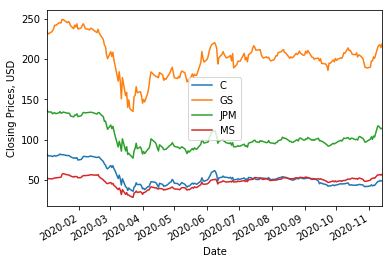

In [337]:
asset_prices_covid = portfolio.loc['2020-01-01':'2020-12-31']

# Plot portfolio's asset prices during this time
asset_prices_covid.plot().set_ylabel("Closing Prices, USD")
plt.show()

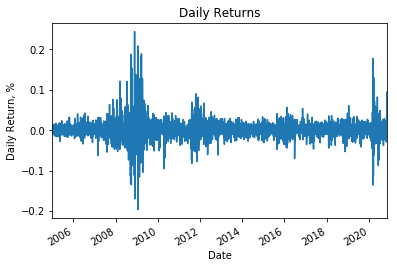

In [338]:
# Computing the portfolio's daily returns
asset_returns = portfolio.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.title('Daily Returns')
plt.show()

In [335]:
covid = pd.read_csv("Data/covid_daily.csv", parse_dates=['date'], index_col='date')

covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297 entries, 2020-01-22 to 2020-11-13
Data columns (total 1 columns):
positive    297 non-null int64
dtypes: int64(1)
memory usage: 4.6 KB


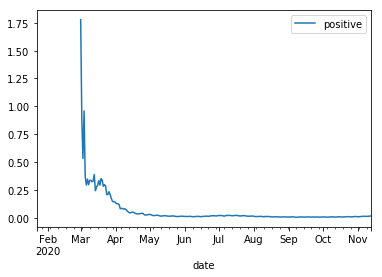

In [336]:
covid.pct_change().plot()

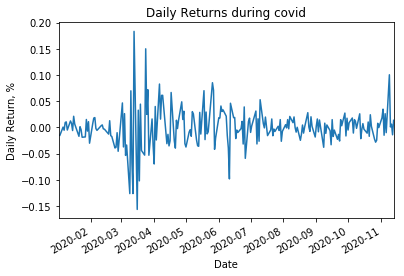

In [339]:
weights = [0.25, 0.25, 0.25, 0.25]

asset_returns_covid = asset_prices_covid.pct_change()
portfolio_returns_covid = asset_returns_covid.dot(weights)

# Plot portfolio returns
portfolio_returns_covid.plot().set_ylabel("Daily Return, %")
plt.title('Daily Returns during covid')
plt.show()

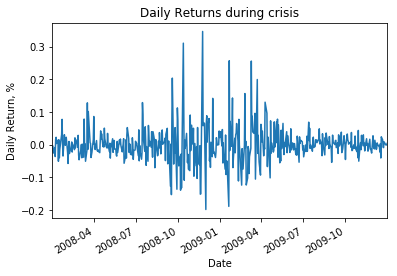

In [278]:
# Computing the portfolio's daily returns
asset_returns_crisis = asset_prices_crisis.pct_change()
portfolio_returns_crisis = asset_returns_crisis.dot(weights)

# Plot portfolio returns
portfolio_returns_crisis.plot().set_ylabel("Daily Return, %")
plt.title('Daily Returns during crisis')
plt.show()

The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008. There was an event during September that precipitated this decline, and that will be examined shortly. The 'spikiness' of portfolio returns indicates how uncertain and volatile asset returns became. 

In [279]:
# Generating the covariance matrix from portfolio asset's returns
covariance_crisis = asset_returns_crisis.cov()

# Annualizing the covariance using 252 trading days per year
covariance_crisis = covariance_crisis * 252

# Displaying the covariance matrix
print(covariance_crisis)

        C    GS   JPM    MS
C   1.475 0.574 0.725 0.822
GS  0.574 0.501 0.427 0.659
JPM 0.725 0.427 0.685 0.561
MS  0.822 0.659 0.561 1.298


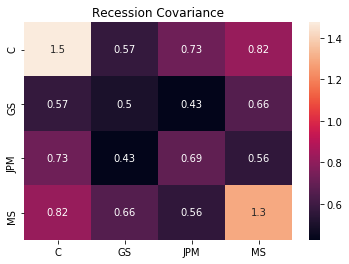

In [345]:
import seaborn as sns

sns.heatmap(covariance_crisis, annot=True)
plt.title('Recession Covariance')
plt.show()

Citibank has the highest covariance

In [340]:
# Generating the covariance matrix from portfolio asset's returns
covariance_covid = asset_returns_covid.cov()

# Annualizing the covariance using 252 trading days per year
covariance_covid = covariance_covid * 252

# Displaying the covariance matrix
print(covariance_covid)

        C    GS   JPM    MS
C   0.504 0.349 0.374 0.372
GS  0.349 0.302 0.281 0.304
JPM 0.374 0.281 0.329 0.307
MS  0.372 0.304 0.307 0.363


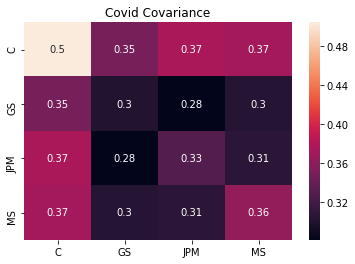

In [346]:
sns.heatmap(covariance_crisis, annot=True)
plt.title('Recession Covariance')
plt.show()

In [280]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance_crisis = np.transpose(weights) @ covariance_crisis @ weights
portfolio_volatility_crisis = np.sqrt(portfolio_variance_crisis)
print(portfolio_volatility_crisis)

0.8475681001908494


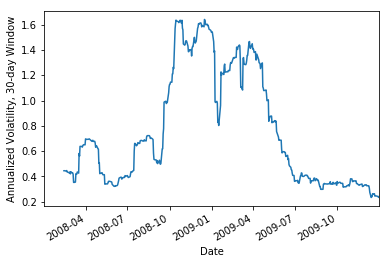

In [281]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed_crisis = portfolio_returns_crisis.rolling(30)

# Compute the annualized volatility series
volatility_series_crisis = returns_windowed_crisis.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series_crisis.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

Citibank exhibited the highest volatility during the crisis period, with Morgan Stanley not far behind. The volatility plot shows that an equal-weighted portfolio of all four banks demonstrated a significant increase in volatility from late September 2008, which is around the time the 4th-largest investment bank in the world, Lehman Brothers, went bankrupt. Its bankruptcy was largely due to mismanagement of the risks associated with its holdings of mortgage-backed securities.

Risk exposure: measure of possible portfolio loss 
Systematic Risk: risk factors affecting volatility of all portfolio
-> Inflation
-> Interest rate change 

Idiosyncratic risk: risk specific to particular asset/asset class
-> bond portfolio
-> firm size
-> shock

In [282]:
#90-day mortgage delinquency rate 

delinquency_rate_data = pd.read_csv('Data/StateMortgagesPercent-90-plusDaysLate-thru-2017-03.csv', 
                                    parse_dates=['Date'], index_col='Date')

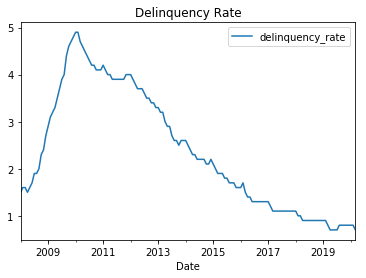

In [283]:
delinquency_rate_data.plot(title='Delinquency Rate')

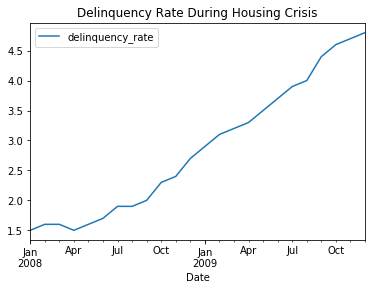

In [316]:
mort_del = delinquency_rate_data['2008-01':'2009-12']

# Plot portfolio's asset prices during this time
mort_del.plot(title='Delinquency Rate During Housing Crisis')
plt.show()

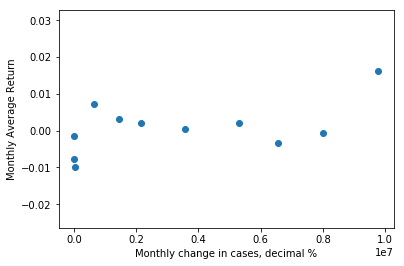

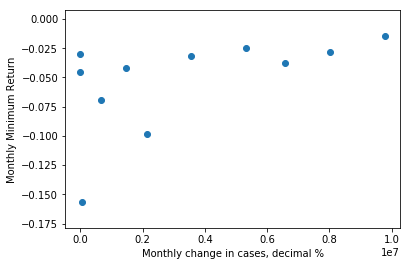

In [368]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average_covid = portfolio_returns_covid.resample('MS').mean().dropna()
covid_average = covid.resample('MS').mean().dropna()
# Create a scatterplot between delinquency and quarterly average returns
plt.scatter(covid_average, portfolio_q_average_covid)
plt.xlabel('Monthly change in cases, decimal %')
plt.ylabel('Monthly Average Return')
plt.show()

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min_covid = portfolio_returns_covid.resample('M').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.scatter(covid_average, portfolio_q_min_covid)
plt.xlabel('Monthly change in cases, decimal %')
plt.ylabel('Monthly Minimum Return')
plt.show()

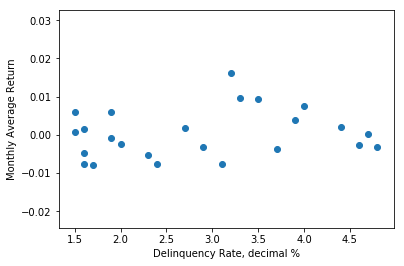

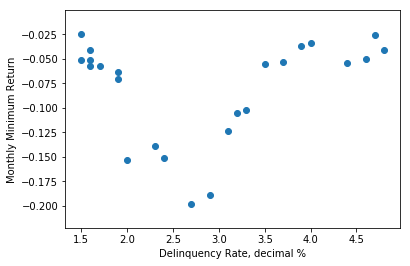

In [321]:
# Factor models
# Fama-French factor model

# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = portfolio_returns_crisis.resample('MS').mean().dropna()

# Create a scatterplot between delinquency and quarterly average returns
plt.scatter(mort_del, portfolio_q_average)
plt.xlabel('Delinquency Rate, decimal %')
plt.ylabel('Monthly Average Return')
plt.show()

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min = portfolio_returns_crisis.resample('M').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.scatter(mort_del, portfolio_q_min)
plt.xlabel('Delinquency Rate, decimal %')
plt.ylabel('Monthly Minimum Return')
plt.show()

Initial assessment indicates that there is little correlation between average returns and mortgage delinquencies, but a stronger negative correlation exists between minimum returns and delinquency.

In [369]:
covid_average

,positive
date,
2020-01-01,0.000
2020-02-01,0.621
2020-03-01,39213.065
2020-04-01,654342.033
2020-05-01,1460195.645
2020-06-01,2152486.967
2020-07-01,3561546.677
2020-08-01,5318943.226
2020-09-01,6574420.833


In [373]:
portfolio_q_average_covid = portfolio_returns_covid.resample('MS').mean().dropna()
covid_average = covid.resample('MS').mean().dropna()


returns_windowed_covid = portfolio_returns_covid.rolling(30)

# Compute the annualized volatility series
volatility_series_covid = returns_windowed_covid.std()*np.sqrt(252)
volatility_series_monthly_mean_covid = volatility_series_covid.resample('MS').mean().fillna(0)

# Add a constant to the regression
covid_average = sm.add_constant(covid_average)

# Create the regression factor model and fit it to the data
results = sm.OLS(volatility_series_monthly_mean_covid.resample('MS').min().dropna(), covid_average).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.243
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.294
Time:                        15:01:13   Log-Likelihood:                -1.9438
No. Observations:                  11   AIC:                             7.888
Df Residuals:                       9   BIC:                             8.683
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.138      4.100      0.0

In [322]:
import statsmodels.api as sm

# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_returns_crisis.resample('MS').mean().dropna(), mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9512
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.340
Time:                        14:19:48   Log-Likelihood:                 88.347
No. Observations:                  24   AIC:                            -172.7
Df Residuals:                      22   BIC:                            -170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0029      0.004  

In [323]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_returns_crisis.resample('MS').min().dropna(), mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.6926
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.414
Time:                        14:19:48   Log-Likelihood:                 37.819
No. Observations:                  24   AIC:                            -71.64
Df Residuals:                      22   BIC:                            -69.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1035      0.030  

In [324]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed_crisis = portfolio_returns_crisis.rolling(30)

# Compute the annualized volatility series
volatility_series_crisis = returns_windowed_crisis.std()*np.sqrt(252)

volatility_series_monthly_mean_crisis = volatility_series_crisis.resample('MS').mean().fillna(0)

mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(volatility_series_monthly_mean_crisis, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2340
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.633
Time:                        14:19:48   Log-Likelihood:                -14.737
No. Observations:                  24   AIC:                             33.47
Df Residuals:                      22   BIC:                             35.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8379      0.265  

Mortgage delinquencies are acting as a systematic risk factor for both minimum quarterly returns and average volatility of returns (p-value), but not for average quarterly returns. The R-squared goodness of fit isn't high in any case, but a model with more factors would likely generate greater explanatory power.

In [294]:
# Modern portfolio theory - Markowitz efficient portfolio; maximize return conditioned on risk
#CLA: Constrained line algorithm

portfolio.head()

,C,GS,JPM,MS
Date,,,,
2005-01-03,482.700,104.950,25.320,55.900
2005-01-04,478.600,104.270,25.060,55.300
2005-01-05,484.600,103.800,25.110,54.980
2005-01-06,489.300,105.230,25.260,56.280
2005-01-07,486.500,104.780,25.060,56.060


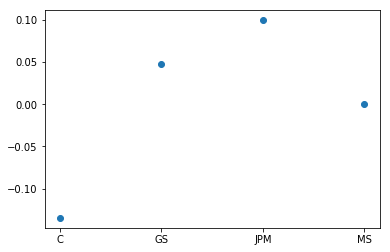

In [295]:
# Import the mean_historical_return method
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(portfolio, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

The average historical return is usually available as a proxy for expected returns, but is not always accurate--a more thorough estimate of expected returns requires an assumption about the return distribution. (2007 to today).

Modern Portfolio Theory is the cornerstone of portfolio risk management, because the efficient frontier is a standard method of assessing both investor risk appetite and market risk-return tradeoffs. To compute the efficient frontier, both expected returns and the covariance matrix of the portfolio are required.

Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance. Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.

One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to improve efficiency. In this exercise, you'll use pypfopt.risk_models's CovarianceShrinkage object to transform sample covariance into an efficient estimate. The textbook error shrinkage method, .ledoit_wolf(), is a method of this object.

Asset prices are available in your workspace. Note that although the CovarianceShrinkage object takes prices as input, it actually calculates the covariance matrix of asset returns, not prices.

In [380]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3996 entries, 2005-01-03 to 2020-11-13
Data columns (total 4 columns):
C      3996 non-null float64
GS     3996 non-null float64
JPM    3996 non-null float64
MS     3996 non-null float64
dtypes: float64(4)
memory usage: 316.1 KB


In [296]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(portfolio)

# Compute the sample covariance matrix of returns
sample_cov = portfolio.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
         C    GS   JPM    MS
C   0.282 0.136 0.158 0.183
GS  0.136 0.136 0.109 0.155
JPM 0.158 0.109 0.152 0.137
MS  0.183 0.155 0.137 0.267 

Efficient Covariance Matrix
         C    GS   JPM    MS
C   0.280 0.133 0.155 0.178
GS  0.133 0.137 0.106 0.151
JPM 0.155 0.106 0.153 0.134
MS  0.178 0.151 0.134 0.266 



Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.

In [397]:
#Breaking down financial crisis

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch

e_cov = {}
returns_dict = {}

for x in epochs.keys():
    sub_price = portfolio.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
    returns_dict[x] = sub_price.pct_change()
    print(e_cov[x])

# Display the efficient covariance matrices for all epochs
#print("Efficient Covariance Matrices\n", e_cov)

        C    GS   JPM    MS
C   0.018 0.013 0.014 0.014
GS  0.013 0.044 0.018 0.031
JPM 0.014 0.018 0.024 0.017
MS  0.014 0.031 0.017 0.043
        C    GS   JPM    MS
C   0.713 0.324 0.365 0.465
GS  0.324 0.409 0.225 0.435
JPM 0.365 0.225 0.422 0.299
MS  0.465 0.435 0.299 0.994
        C    GS   JPM    MS
C   0.840 0.252 0.356 0.344
GS  0.252 0.244 0.223 0.231
JPM 0.356 0.223 0.382 0.279
MS  0.344 0.231 0.279 0.388


The breakdown of the 2005 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis, and this changed the risk-return trade-off after the crisis. For future reference, also note that although we used a loop in this exercise, a dictionary comprehension could also have been used to create the efficient covariance matrix.

Previously you examined the covariance matrix of the investment bank portfolio before, during and after the financial crisis. Now you will visualize the changes that took place in the efficient frontier, showing how the crisis created a much higher baseline risk for any given return.

Using the PyPortfolioOpt pypfopt library's Critical Line Algorithm (CLA) object, you will derive and visualize the efficient frontier during the crisis period, and add it to a scatterplot already displaying the efficient frontiers before and after the crisis.

Expected returns returns_during and the efficient covariance matrix ecov_during are available, as is the CLA object from pypfopt. (Remember that DataCamp plots can be expanded to their own window, which can increase readability.)

OrderedDict([('C', 0.6573662139640911), ('GS', 0.041308203103604176), ('JPM', 0.25601651028829225), ('MS', 0.045309072644012585)])


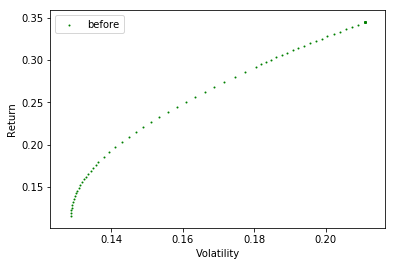

OrderedDict([('C', 0.0), ('GS', 0.5177442966055827), ('JPM', 0.48225570339441726), ('MS', 0.0)])


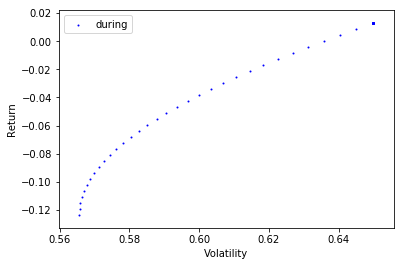

OrderedDict([('C', 0.0), ('GS', 0.8629331043731976), ('JPM', 0.10262436678192272), ('MS', 0.034442528844879534)])


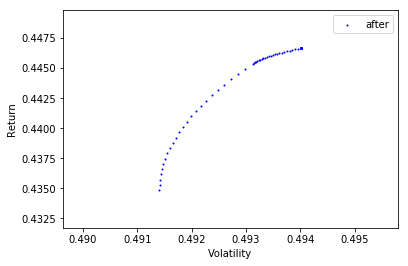

In [398]:
#The efficient frontier and the financial crisis

from pypfopt import CLA

# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_dict['before'].mean().dropna()*252, e_cov['before'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'before')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

efficient_portfolio_during = CLA(returns_dict['during'].mean().dropna()*252, e_cov['during'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'b', marker = '.', label = 'during')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

efficient_portfolio_during = CLA(returns_dict['after'].mean().dropna()*252, e_cov['after'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'b', marker = '.', label = 'after')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

OrderedDict([('C', 0.6573662139640911), ('GS', 0.041308203103604176), ('JPM', 0.25601651028829225), ('MS', 0.045309072644012585)])
OrderedDict([('C', 0.0), ('GS', 0.5177442966055827), ('JPM', 0.48225570339441726), ('MS', 0.0)])
OrderedDict([('C', 0.0), ('GS', 0.8629331043731976), ('JPM', 0.10262436678192272), ('MS', 0.034442528844879534)])


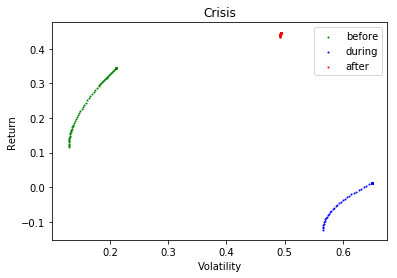

In [399]:
# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_dict['before'].mean().dropna()*252, e_cov['before'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'before')
plt.legend()

efficient_portfolio_during = CLA(returns_dict['during'].mean().dropna()*252, e_cov['during'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'b', marker = '.', label = 'during')
plt.legend()

efficient_portfolio_during = CLA(returns_dict['after'].mean().dropna()*252, e_cov['after'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'r', marker = '.', label = 'after')
plt.legend()

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Crisis')
plt.show()

In [400]:
#Before and During Covid

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2018', 'end': '2-1-2020'},
           'during' : {'start': '3-1-2020', 'end': '31-12-2020'}
         }

# Compute the efficient covariance for each epoch

e_cov = {}
returns_dict = {}

for x in epochs.keys():
    sub_price = portfolio.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
    returns_dict[x] = sub_price.pct_change()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)

Efficient Covariance Matrices
 {'before':         C    GS   JPM    MS
C   0.059 0.046 0.042 0.051
GS  0.046 0.061 0.040 0.052
JPM 0.042 0.040 0.042 0.045
MS  0.051 0.052 0.045 0.066, 'during':         C    GS   JPM    MS
C   0.579 0.385 0.413 0.409
GS  0.385 0.355 0.310 0.333
JPM 0.413 0.310 0.386 0.339
MS  0.409 0.333 0.339 0.415}


OrderedDict([('C', 0.0), ('GS', 0.6001728666438816), ('JPM', 0.39982713335611836), ('MS', 0.0)])


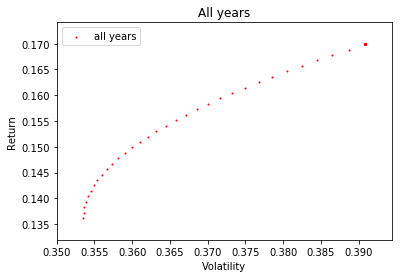

In [401]:
e_cov_all = CovarianceShrinkage(portfolio).ledoit_wolf()
returns_all = portfolio.pct_change().mean().dropna()*252

efficient_portfolio_all = CLA(returns_all, e_cov_all)
print(efficient_portfolio_all.min_volatility())

(ret, vol, weights) = efficient_portfolio_all.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'r', marker = '.', label = 'all years')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('All years')
plt.show()

OrderedDict([('C', 0.0), ('GS', 0.1079756179645492), ('JPM', 0.8920243820354509), ('MS', 0.0)])
OrderedDict([('C', 0.0), ('GS', 0.6024527360845738), ('JPM', 0.3595232174615291), ('MS', 0.03802404645389738)])


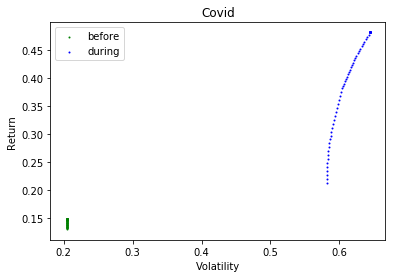

In [402]:
efficient_portfolio_during = CLA(returns_dict['before'].mean().dropna()*252, e_cov['before'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'before')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.show()

efficient_portfolio_during = CLA(returns_dict['during'].mean().dropna()*252, e_cov['during'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'b', marker = '.', label = 'during')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Covid')
plt.show()


In [303]:
# Loss Distribution

# Maximum loss of a portfolio
# likelihood of loss
# Value at Risk (VaR) - confidence levels: 95%, 99% and 99.5 %
# assuming loss is normally distributed

#derived weights - min volatility

weights = [0.0, 0.6, 0.4, 0.0]

pm = (portfolio * weights).pct_change().fillna(0).mean().sum().mean()

ps = np.transpose(weights) @ covariance @ weights

In [304]:
pm, ps

(0.0011252400151638916, 0.1253848064789594)

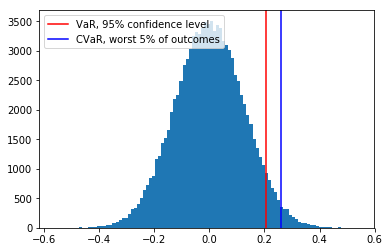

In [305]:
from scipy.stats import norm

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='b', label = "CVaR, worst 5% of outcomes")
plt.legend()
plt.show()

The CVaR is a richer measure of risk than the VaR, but can be more difficult to compute when the distribution of losses (or returns) is unknown, or is more complicated than a Normal distribution. Nevertheless, both measures are used in risk management to identify 'danger signs' when portfolio losses approach the VaR or CVaR threshold. Although VaR and CVaR are similar (and only one letter apart!), it's generally the case that CVaR is the preferred risk measure for risk management. One reason is that it is affected by the tail of the loss distribution, while VaR is a static value. The shape and mass of the tail of the distribution contribute to the expected value, and so the CVaR uses tail information well. (It also requires the VaR, so that's still an important statistic!) 



CVaR is the expected value of loss given a minimum loss threshold. So CVaR is already in the form of a risk exposure--it is the sum (or integral) of the probability of loss in the distribution tail multiplied, by the loss amount.

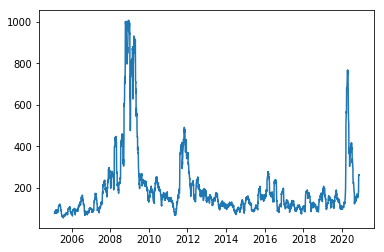

In [306]:
# Risk exposure and loss

# Probability of loss - chance of negative shock
# VaR, CVar - loss associated with shock 
# Risk Tolerance - Desire to avoid shock
    # Risk-neutral
    # Risk Neutral
# Risk exposure - prob of loss * loss measure [VaR]
# t-distribution

from scipy.stats import t

losses = (portfolio*0.25).pct_change().sum(axis=1)
# Create rolling window parameter list
mu = losses.rolling(30).mean()
sigma = losses.rolling(30).std()
rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]

# Compute the 99% VaR array using the rolling window parameters
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters] )

# Plot the minimum risk exposure over the 2005-2010 time period
plt.plot(losses.index, 0.01 * VaR_99 * 100000)
plt.show()

Because the confidence level was fixed at 99%, we kept the probability of loss at 1%. This means the risk exposure is just a rescaled VaR measure of the maximum portfolio loss 99% of the time. You can see how much larger the risk exposure was during the heart of the crisis in 2009 and same in 2020 during covid.

In [307]:
# Fit the Student's t distribution to crisis losses - 2008

crisis_losses = (portfolio.loc['1-1-2008':'31-12-2009']*0.25).pct_change().sum(axis=1)

p = t.fit(crisis_losses)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect(lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(CVaR_99)

1.3464161258227278


In [308]:
# Fit the Student's t distribution to covid losses - 2020

crisis_losses = (portfolio.loc['3-1-2020':'31-12-2020']*0.25).pct_change().sum(axis=1)

p = t.fit(crisis_losses)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect(lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(CVaR_99)

0.7472813159889194


The Student's t-distribution is widely used when the Normal distribution is too restrictive for portfolio losses, but still allows convergence to the Normal when the sample size becomes very large.

In [ ]:
# Portfolio Hedging

# Hedging: offset volatility with another asset



In [410]:
# Neural Networks

from keras.models import Sequential
from keras.layers import Dense

In [411]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
model.add(Dense(4))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=100)

In [ ]:
predicted = model.predict(new_asset_prices)

Epoch 1/100
125/125 [==============================] - 0s 575us/step - loss: 5.9456
Epoch 2/100
125/125 [==============================] - 0s 543us/step - loss: 2.7919
Epoch 3/100
125/125 [==============================] - 0s 550us/step - loss: 1.3665
Epoch 4/100
125/125 [==============================] - 0s 549us/step - loss: 0.6589
Epoch 5/100
125/125 [==============================] - 0s 548us/step - loss: 0.3224
Epoch 6/100
125/125 [==============================] - 0s 531us/step - loss: 0.1892
Epoch 7/100
125/125 [==============================] - 0s 524us/step - loss: 0.1567
Epoch 8/100
125/125 [==============================] - 0s 572us/step - loss: 0.1420
Epoch 9/100
125/125 [==============================] - 0s 574us/step - loss: 0.1286
Epoch 10/100
125/125 [==============================] - 0s 661us/step - loss: 0.1190
Epoch 11/100
125/125 [==============================] - 0s 573us/step - loss: 0.1123
Epoch 12/100
125/125 [==============================] - 0s 548us/step - lo

125/125 [==============================] - 0s 479us/step - loss: 0.0092
Epoch 98/100
125/125 [==============================] - 0s 477us/step - loss: 0.0094
Epoch 99/100
125/125 [==============================] - 0s 460us/step - loss: 0.0094
Epoch 100/100
125/125 [==============================] - 0s 460us/step - loss: 0.0093


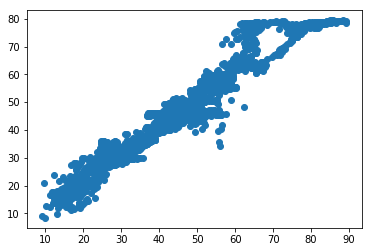

In [413]:
# Set the input and output data
training_input = portfolio.drop('MS', axis=1)
training_output = portfolio['MS']

# Create and train the neural network with two hidden layers
model = Sequential()
model.add(Dense(16, input_dim=3, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=100)

# Scatter plot of the resulting model prediction
plt.scatter(training_output, model.predict(training_input)); plt.show()

In [416]:
model = Sequential()
model.add(Dense(128, input_dim = 4, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# Use the pre-trained model to predict portfolio weights given new asset returns
asset_returns = np.array([0.001060, 0.003832, 0.000726, -0.002787])
asset_returns.shape = (1,4)
print("Predicted minimum volatility portfolio: ", model.predict(asset_returns))

Predicted minimum volatility portfolio:  [[0.         0.         0.00016831 0.        ]]
